
**TENSORFLOW RECURRENT NEURAL NETWORK**

In [ ]:
#importing libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score
from sklearn.ensemble import RandomForestClassifier






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/emotions.csv')

In [ ]:
data


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,mean_d_29_a,...,fft_711_b,fft_712_b,fft_713_b,fft_714_b,fft_715_b,fft_716_b,fft_717_b,fft_718_b,fft_719_b,fft_720_b,fft_721_b,fft_722_b,fft_723_b,fft_724_b,fft_725_b,fft_726_b,fft_727_b,fft_728_b,fft_729_b,fft_730_b,fft_731_b,fft_732_b,fft_733_b,fft_734_b,fft_735_b,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,2.15,29.5,-353.0,14.40,21.5,5.98,30.7,-343.0,14.70,27.9,3.170,32.2,-368.0,15.90,36.4,7.08,28.8,-359.0,17.30,19.6,-3.8300,-1.230,-10.80000,-0.363,-6.41,-1.03,-2.780,14.600,-1.540,-14.900000,...,30.90,-24.4,-24.4,30.90,-442.0,388.0,-197.0,-197.0,388.0,-564.0,500.00,-245.00,-245.00,500.00,-88.8,214.0,-88.8,-88.8,214.0,-606.0,509.000,-261.0,-261.0,509.000,-399.0,374.00,-185.00,-185.00,374.00,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,25.60,32.8,29.6,21.50,17.4,25.50,31.7,31.5,26.20,32.9,31.800,33.1,33.2,28.50,26.8,32.40,34.7,33.8,27.00,14.2,0.0342,1.100,-1.87000,-4.690,-15.40,-6.22,-0.328,-3.530,-6.980,-9.370000,...,-5.99,-19.1,-19.1,-5.99,163.0,-11.0,-10.7,-10.7,-11.0,117.0,-3.93,17.90,17.90,-3.93,112.0,-13.9,25.5,25.5,-13.9,225.0,-0.968,-27.7,-27.7,-0.968,97.4,-19.00,40.70,40.70,-19.00,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,7.75,30.1,-441.0,9.89,25.3,-68.90,25.3,-481.0,-65.40,20.0,79.800,31.0,-408.0,91.90,29.5,18.80,31.1,-335.0,32.20,19.9,76.6000,4.850,39.90000,75.300,5.27,-72.00,-0.843,-33.000,-82.000,-4.200000,...,585.00,-285.0,-285.0,585.00,-94.3,183.0,-110.0,-110.0,183.0,-133.0,200.00,-72.00,-72.00,200.00,-356.0,295.0,-158.0,-158.0,295.0,-251.0,255.000,-95.7,-95.7,255.000,-177.0,159.00,-48.80,-48.80,159.00,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,17.30,32.0,-148.0,20.40,22.8,13.20,31.5,-147.0,16.90,27.7,15.700,30.7,-142.0,20.70,22.8,13.60,32.2,-135.0,21.20,23.8,4.1500,0.556,-0.35400,3.460,-4.96,1.63,1.330,-5.830,-0.298,0.000777,...,249.00,-146.0,-146.0,249.00,359.0,-146.0,13.7,13.7,-146.0,119.0,-7.64,-7.17,-7.17,-7.64,-296.0,316.0,-218.0,-218.0,316.0,322.0,-113.000,38.4,38.4,-113.000,245.0,-61.90,-5.08,-5.08,-61.90,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,26.10,34.3,43.7,23.70,20.6,-3.87,34.1,43.7,-10.00,22.9,59.400,26.7,60.3,64.70,26.9,32.30,30.1,33.6,31.60,27.7,30.0000,0.276,-0.00677,33.700,-2.36,-33.30,7.640,-16.600,-41.100,-6.290000,...,18.30,-11.9,-11.9,18.30,159.0,-18.2,-25.6,-25.6,-18.2,194.0,32.70,-54.50,-54.50,32.70,154.0,26.4,-56.4,-56.4,26.4,252.0,9.940,-37.4,-37.4,9.940,172.0,15.90,-7.25,-7.25,15.90,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,33.30,33.4,31.0,32.30,18.6,30.00,33.0,32.6,29.50,29.1,32.000,29.9,32.6,28.50,24.9,34.50,32.4,32.4,33.00,20.8,3.3500,0.461,-1.61000,2.880,-10.60,1.31,3.490,-1.540,3.860

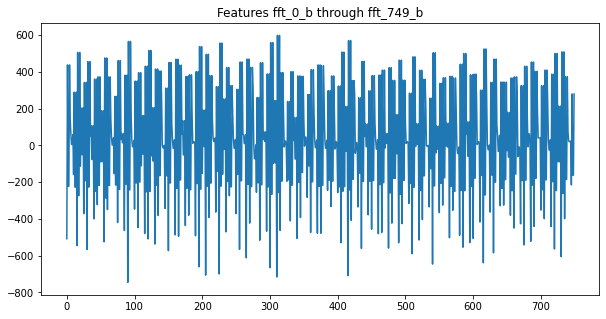

In [ ]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']       #visualizing time series data via using matplotlib

plt.figure(figsize=(10, 5))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [ ]:
data['label'].value_counts()



NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [ ]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}           
                                                                     
   


In [ ]:
# pre-processing the inputs
def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)   
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))   #dividing the 2d array into 1 d vector array

expand_dims = tf.expand_dims(inputs, axis=2)  #expanding dimensions of array at pos=2

gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims) #true return sequence will return all the previous o/p in the memory

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims_3 (TFOpLambd  (None, 2548, 1)          0         
 a)                                                              
                                                                 
 gru_3 (GRU)                 (None, 2548, 256)         198912    
                                                                 
 flatten_3 (Flatten)         (None, 652288)            0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________

In [ ]:
#training the model
model.compile(
    optimizer='adam',                                  #for classification purpose
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,                             # doing validation split on training data for about 70-30
    batch_size=32,                                    # dataset is divided into no. of batch sizes.
    epochs=50,                                        # no. of passes/loop for the entire datatset
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',                      #if the losses during the training of the model doesnt decrease any further , call back function
            patience=5,                              # sets is to stop early
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
38/38 [==============================] - 233s 6s/step - loss: 31.3598 - accuracy: 0.7821 - val_loss: 6.1624 - val_accuracy: 0.9064
Epoch 2/50
38/38 [==============================] - 248s 7s/step - loss: 8.9587 - accuracy: 0.9011 - val_loss: 5.9285 - val_accuracy: 0.9298
Epoch 3/50
38/38 [==============================] - 231s 6s/step - loss: 1.8610 - accuracy: 0.9556 - val_loss: 2.6844 - val_accuracy: 0.9097
Epoch 4/50
38/38 [==============================] - 228s 6s/step - loss: 1.5753 - accuracy: 0.9606 - val_loss: 1.8965 - val_accuracy: 0.9666
Epoch 5/50
38/38 [==============================] - 230s 6s/step - loss: 0.7854 - accuracy: 0.9707 - val_loss: 8.8445 - val_accuracy: 0.9264
Epoch 6/50
38/38 [==============================] - 231s 6s/step - loss: 1.0927 - accuracy: 0.9807 - val_loss: 4.8790 - val_accuracy: 0.9398
Epoch 7/50
38/38 [==============================] - 229s 6s/step - loss: 0.5800 - accuracy: 0.9849 - val_loss: 9.9484 - val_accuracy: 0.8963
Epoch 8/50
3

In [ ]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 96.406%


Classification Report
---------------
               precision    recall  f1-score   support

    NEGATIVE       0.96      0.96      0.96       201
     NEUTRAL       1.00      0.98      0.99       231
    POSITIVE       0.93      0.96      0.95       208

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640



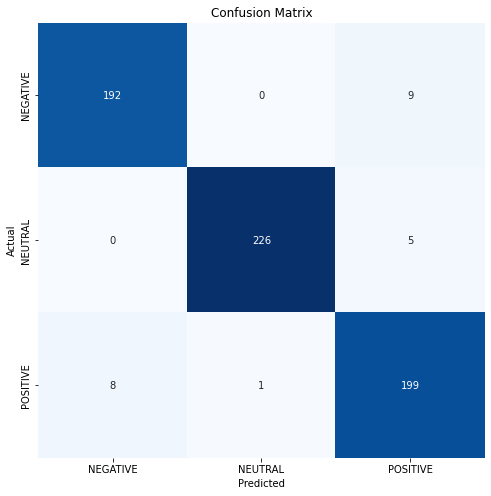

In [ ]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show
print("Classification Report\n---------------\n",clr)

* **RANDOM FOREST CLASSIFIER**

In [ ]:
X=data.iloc[:,0:2548]          #selecting particular rows for training and prediction         
y=data.iloc[:,2548]

In [ ]:
# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=55           #random-state sets a seed so that train and test datasets are reproducable
)

In [ ]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=50)   # n-estimator=no. of decision trees

# Train the model using the training sets
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
# predictin on the test set
y_pred = classifier.predict(X_test)

In [ ]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 98.59484777517564


In [ ]:
cm=sklearn.metrics.confusion_matrix(y_test,y_pred)
print (cm)

[[139   0   2]
 [  0 147   2]
 [  2   0 135]]
